In [1]:
import cv2
import mediapipe as mp

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [11]:
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False       
        
        results = holistic.process(image)
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [12]:
import os
import csv
import numpy as np

In [13]:
num_coords = len(results.face_landmarks.landmark)
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [14]:
with open('Face_keypoints.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [32]:
class_name = 'Happy' #Happy #Sad #Angry #Surprise

In [33]:
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        results = holistic.process(image)
        
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))

        try:
            
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            row = face_row 
            row.insert(0, class_name)
            
            with open('Face_keypoints.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [34]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('Face_keypoints.csv')
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z466,v466,x467,y467,z467,v467,x468,y468,z468,v468
0,Surprise,0.524072,0.549330,-0.042529,0.0,0.523366,0.485028,-0.064932,0.0,0.522649,...,-0.000613,0.0,0.609566,0.396959,0.026292,0.0,0.617043,0.386512,0.027607,0.0
1,Surprise,0.528796,0.547702,-0.041729,0.0,0.530803,0.486096,-0.061814,0.0,0.528777,...,0.002040,0.0,0.604993,0.404239,0.028051,0.0,0.611865,0.395554,0.029382,0.0
2,Surprise,0.550601,0.538511,-0.041617,0.0,0.553931,0.478066,-0.061676,0.0,0.550615,...,0.001907,0.0,0.623556,0.400310,0.030076,0.0,0.629978,0.392724,0.031367,0.0
3,Surprise,0.562175,0.549718,-0.044130,0.0,0.568406,0.486052,-0.060482,0.0,0.562831,...,0.007010,0.0,0.630855,0.416757,0.039293,0.0,0.636770,0.408905,0.041209,0.0
4,Surprise,0.583775,0.551414,-0.041062,0.0,0.590257,0.489065,-0.058286,0.0,0.582801,...,0.008185,0.0,0.639132,0.414603,0.047492,0.0,0.644114,0.407629,0.049897,0.0


In [36]:
df["class"].value_counts()

Angry       122
Sad         109
Happy       106
Surprise     92
Name: class, dtype: int64

<AxesSubplot:ylabel='class'>

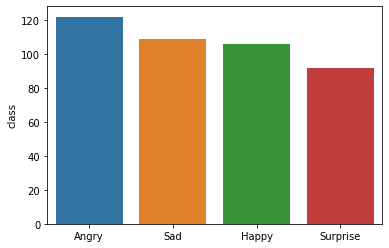

In [37]:
sns.barplot(df["class"].value_counts().index, df["class"].value_counts())